## kaggle 데이터 연습

In [1]:
import pandas as pd 

train = pd.read_csv("../test_data/train.csv")
train.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10480\172789815.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [2]:
train.shape

(11504798, 12)

## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [8]:
train['Age_Group'] = train['Age'].apply

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,Young


## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [9]:
# code

Gender
Female    30270.952164
Male      30622.698524
Name: Annual_Premium, dtype: float64

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [11]:
# code

(764141, 13)

## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [14]:
# code

(4210510, 13)

### 층화추출

In [7]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

C:\Users\pcuser\AppData\Local\Temp\ipykernel_20356\1063128695.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = train.groupby('Response').apply(


# Matplotlib & Seaborn

In [4]:
import matplotlib.pyplot as plt

In [5]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

<class 'matplotlib.axes._axes.Axes'>


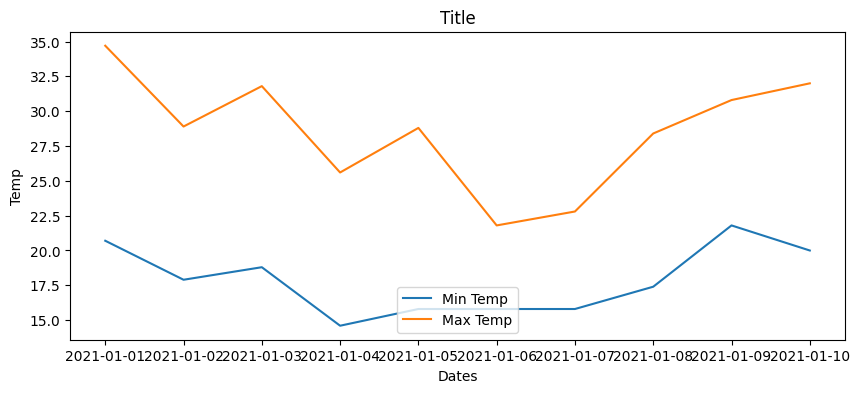

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dates, min_temperature, label = 'Min Temp')
ax.plot(dates, max_temperature, label = 'Max Temp')
print(type(ax))

ax.legend(loc=8)
ax.set_xlabel("Dates")
ax.set_ylabel("Temp")
ax.set_title("Title")
plt.show()

In [15]:
!pip install yfinance --upgrade --no-cache-dir


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 9.6 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 13.0 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 18.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB ? eta 0:00:0

In [16]:
import yfinance as yf

TSLA = yf.download("TSLA", start="2020-01-01", end="2024-07-02")
TSLA.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


C:\Users\user\AppData\Local\Temp\ipykernel_10480\4253607009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(TSLA['Open'].index,rotation=20)


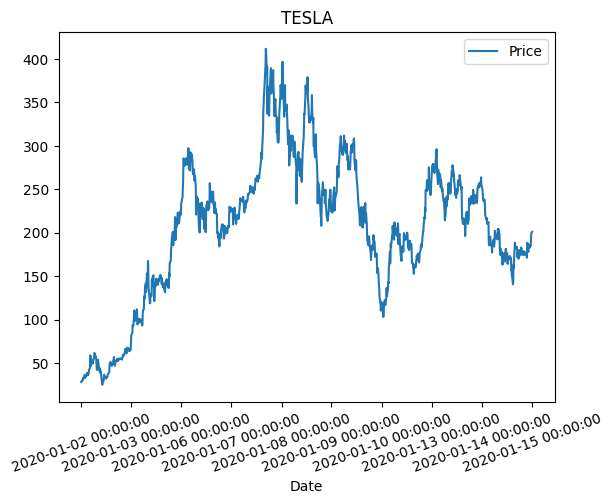

In [22]:
fig, ax = plt.subplots()
ax.plot(TSLA['Open'])
ax.set_title("TESLA")
ax.legend(labels=['Price'], loc='best')
ax.set_xlabel('Date')
ax.set_xticklabels(TSLA['Open'].index,rotation=20)
plt.show()

<class 'matplotlib.axes._axes.Axes'>


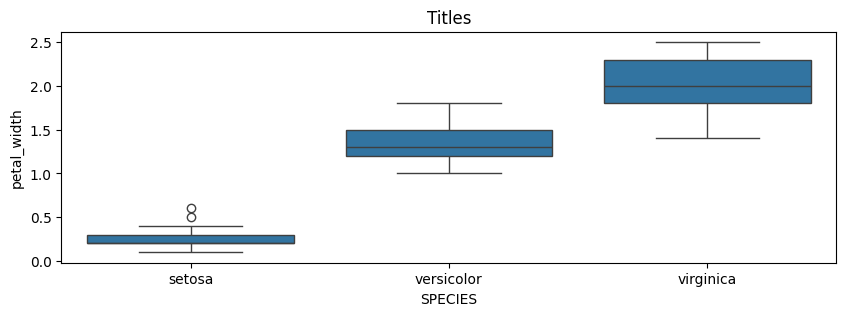

In [27]:
import seaborn as sns

iris = sns.load_dataset('iris')

fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=iris, x='species', y='petal_width',ax=ax)
ax.set_title("Titles")
ax.set_xlabel("SPECIES")
print(type(ax))
plt.show()

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [30]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


## 축 옵션 UDF 함수

In [55]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

## 시각화 객체지향 선언

In [44]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
#group_mean.sort_values(ascending=False).idxmax()
h_mean = float(np.round(group_mean.sort_values(ascending=False).values[0], 2))
h_day, h_mean

C:\Users\user\AppData\Local\Temp\ipykernel_10480\1321348953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg('mean')


('Sun', 21.41)

17.68
17.15
20.44
21.41


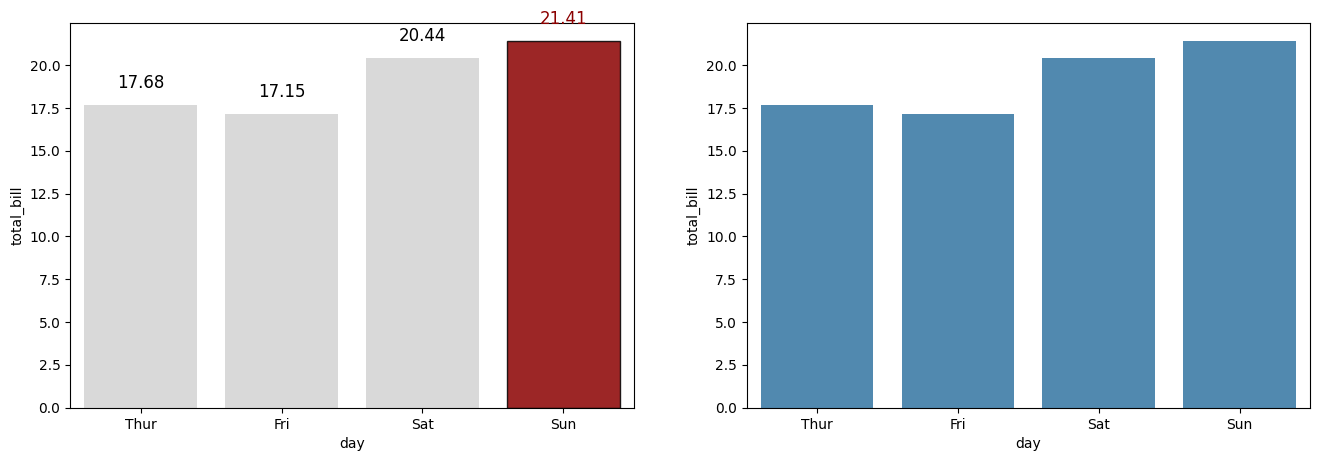

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax0 = sns.barplot(x='day', y='total_bill', data=tips,
                 errorbar=None, color='lightgray', alpha=0.85, zorder=2,
                  ax=ax[0])


for p in ax0.patches:
   # print(p, type(p))
    fontweight='normal'
    color='k'
    height=np.round(p.get_height(),2)
    print(height)
    if h_mean == height:
        #sun이면 색상을 다르게 주겠다
        foreweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
   # else:
    #    p.set_facecolor(color)
     #   p.set_edgecolor('black')
    ax0.text(p.get_x() + p.get_width()/2., height+1,
             height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax1 = sns.barplot(x='day', y='total_bill', data=tips,
                  errorbar=None, alpha=0.85, ax=ax[1])

plt.show()

In [ ]:
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)